# CarDekho Price Prediction Model Using Linear Regression 


**Linear regression is a statistical technique that uses a linear equation to model the relationship between variables**

In [56]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
#Load the dataset
data = pd.read_csv("Cardekho.csv")


In [4]:
data

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [5]:
# Get a concise summary of the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [6]:
data.shape

(15411, 14)

In [7]:
data.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [8]:
# first check whether our data is clean or not
#1 check for NULL values
#2 check for duplicates
#3 Wrong data (Wagon R , WagonR) Misspellings

In [9]:
data["car_name"].unique()

array(['Maruti Alto', 'Hyundai Grand', 'Hyundai i20', 'Ford Ecosport',
       'Maruti Wagon R', 'Hyundai i10', 'Hyundai Venue', 'Maruti Swift',
       'Hyundai Verna', 'Renault Duster', 'Mini Cooper', 'Maruti Ciaz',
       'Mercedes-Benz C-Class', 'Toyota Innova', 'Maruti Baleno',
       'Maruti Swift Dzire', 'Volkswagen Vento', 'Hyundai Creta',
       'Honda City', 'Mahindra Bolero', 'Toyota Fortuner', 'Renault KWID',
       'Honda Amaze', 'Hyundai Santro', 'Mahindra XUV500',
       'Mahindra KUV100', 'Maruti Ignis', 'Datsun RediGO',
       'Mahindra Scorpio', 'Mahindra Marazzo', 'Ford Aspire', 'Ford Figo',
       'Maruti Vitara', 'Tata Tiago', 'Volkswagen Polo', 'Kia Seltos',
       'Maruti Celerio', 'Datsun GO', 'BMW 5', 'Honda CR-V',
       'Ford Endeavour', 'Mahindra KUV', 'Honda Jazz', 'BMW 3', 'Audi A4',
       'Tata Tigor', 'Maruti Ertiga', 'Tata Safari', 'Mahindra Thar',
       'Tata Hexa', 'Land Rover Rover', 'Maruti Eeco', 'Audi A6',
       'Mercedes-Benz E-Class', 'Audi Q7'

In [10]:
data["fuel_type"].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [11]:
data["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [12]:
data["seller_type"].nunique()  # number of unique values

3

In [13]:
# which car is being sold the most on the platform?

data["car_name"].value_counts()

Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
                     ... 
Mercedes-AMG C          1
Tata Altroz             1
Ferrari GTC4Lusso       1
Hyundai Aura            1
Force Gurkha            1
Name: car_name, Length: 121, dtype: int64

In [14]:
# value in %
data["car_name"].value_counts(normalize = True)*100

Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: car_name, Length: 121, dtype: float64

# Exploratory Data Analysis (EDA)

## 1) Univariate Analysis: 


**It refers to the process of examining and summarizing data from a single variable at a time**

<AxesSubplot:xlabel='selling_price', ylabel='Density'>

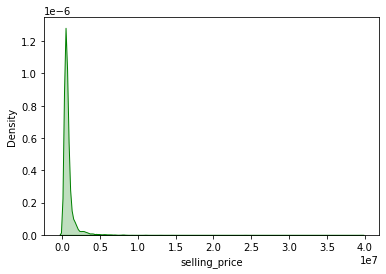

In [15]:
sns.kdeplot(x= data["selling_price"],fill = True ,color = "green")

<AxesSubplot:xlabel='mileage', ylabel='Density'>

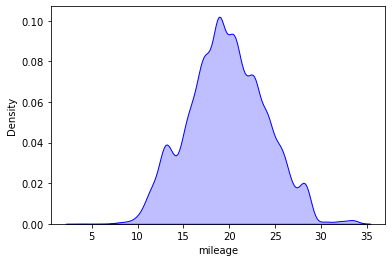

In [17]:
sns.kdeplot(x= data["mileage"],fill = True ,color = "blue")

<AxesSubplot:xlabel='seats', ylabel='Density'>

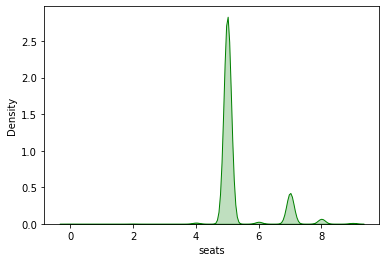

In [18]:
sns.kdeplot(x= data["seats"],fill = True ,color = "green")

<AxesSubplot:xlabel='vehicle_age', ylabel='Density'>

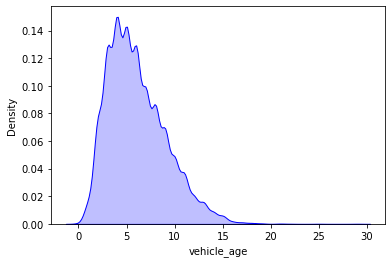

In [19]:
sns.kdeplot(x= data["vehicle_age"],fill = True ,color = "blue")

<AxesSubplot:xlabel='max_power', ylabel='Density'>

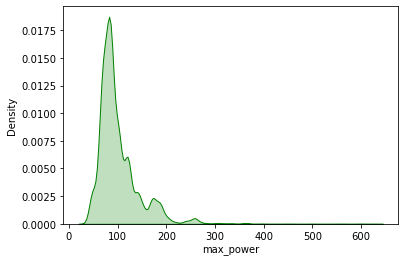

In [20]:
sns.kdeplot(x = data['max_power'],fill =True,color = 'green')

<AxesSubplot:xlabel='engine', ylabel='Density'>

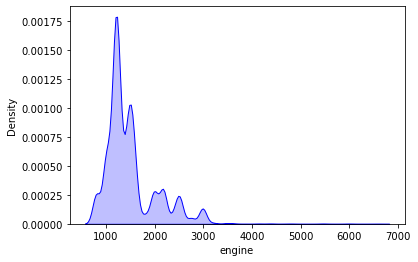

In [21]:
sns.kdeplot(x = data['engine'],fill =True ,color = 'blue')

<AxesSubplot:xlabel='seller_type', ylabel='count'>

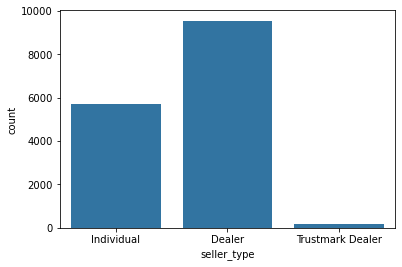

In [22]:
sns.countplot(x = data['seller_type'])

<AxesSubplot:xlabel='fuel_type', ylabel='count'>

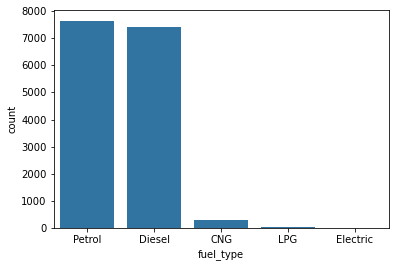

In [23]:
sns.countplot(x = data['fuel_type'])

<AxesSubplot:xlabel='transmission_type', ylabel='count'>

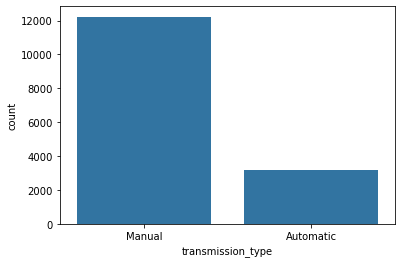

In [24]:
sns.countplot(x = data['transmission_type'])

## 2) Bivariate analysis

 **It refers to the statistical method of examining the relationship between only two variables simultaneously, aiming to understand the correlation or association between them, often by calculating a correlation coefficient and visualizing the data using scatter plots**

Text(0.5, 1.0, 'vehicle vs Selling Price')

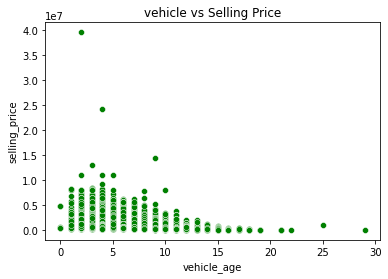

In [30]:
sns.scatterplot(data= data , x = "vehicle_age", y = "selling_price", color = "green")
plt.title('vehicle vs Selling Price')

Text(0.5, 1.0, 'mileage vs Selling Price')

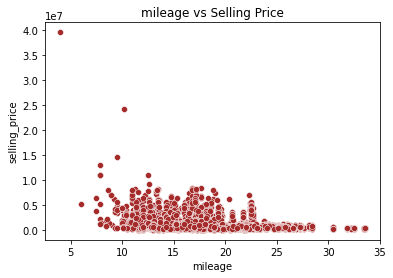

In [31]:
sns.scatterplot(data= data , x = "mileage", y = "selling_price", color = "brown")
plt.title('mileage vs Selling Price')

In [39]:
data[data["mileage"]>=30]

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
169,224,Maruti Wagon R,Maruti,Wagon R,3,52000,Dealer,CNG,Manual,33.54,998,67.04,5,435000
182,239,Maruti Wagon R,Maruti,Wagon R,8,64000,Dealer,CNG,Manual,33.54,998,67.04,5,270000
317,404,Maruti Celerio,Maruti,Celerio,3,28000,Dealer,CNG,Manual,31.79,998,58.33,5,455000
422,544,Maruti Alto,Maruti,Alto,5,45000,Dealer,CNG,Manual,30.46,796,47.30,5,350000
480,618,Maruti Alto,Maruti,Alto,5,42000,Dealer,CNG,Manual,33.44,796,40.30,4,260000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14932,18941,Maruti Celerio,Maruti,Celerio,2,50000,Individual,CNG,Manual,31.79,998,58.33,5,390000
15016,19039,Maruti Alto,Maruti,Alto,5,78950,Dealer,CNG,Manual,30.46,796,47.30,5,299000
15226,19306,Maruti Wagon R,Maruti,Wagon R,5,74844,Dealer,CNG,Manual,33.54,998,67.04,5,390000
15317,19425,Maruti Wagon R,Maruti,Wagon R,7,83521,Dealer,CNG,Manual,32.52,998,58.33,5,335000


In [40]:
data[data["mileage"]<=8]

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
1888,2428,Mercedes-Benz S-Class,Mercedes-Benz,S-Class,5,41000,Dealer,Petrol,Automatic,7.81,5461,362.90,5,11000000
3631,4628,Mercedes-Benz S-Class,Mercedes-Benz,S-Class,10,70000,Dealer,Petrol,Automatic,7.81,5461,362.90,5,2275000
3799,4845,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.00,4,39500000
5590,7104,Porsche Panamera,Porsche,Panamera,11,25000,Dealer,Petrol,Automatic,7.50,4806,394.30,4,3800000
9450,12131,BMW 6,BMW,6,12,65000,Dealer,Petrol,Automatic,7.94,4395,450.00,4,1500000
9722,12456,Mercedes-Benz S-Class,Mercedes-Benz,S-Class,3,4000,Dealer,Petrol,Automatic,7.81,4663,459.00,4,13000000
10040,12839,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.00,5,5200000
10608,13516,Mercedes-Benz S-Class,Mercedes-Benz,S-Class,7,41700,Dealer,Petrol,Automatic,7.81,5461,362.90,5,5200000
10989,13966,Mercedes-Benz S-Class,Mercedes-Benz,S-Class,2,18000,Dealer,Petrol,Automatic,7.81,2996,362.07,5,11000000
12879,16335,Porsche Panamera,Porsche,Panamera,8,25000,Dealer,Diesel,Automatic,7.50,4806,394.30,4,6500000


Text(0.5, 1.0, 'engine vs Selling Price')

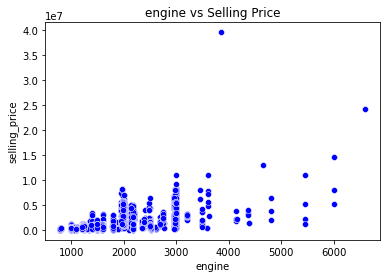

In [33]:
sns.scatterplot(data= data , x = "engine", y = "selling_price", color = "blue")
plt.title('engine vs Selling Price')

Text(0.5, 1.0, 'seats vs Selling Price')

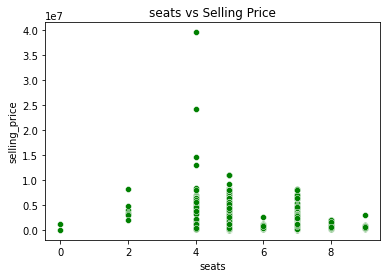

In [36]:
sns.scatterplot(data= data , x = "seats", y = "selling_price", color = "green")
plt.title('seats vs Selling Price')

Text(0.5, 1.0, 'max_power vs Selling Price')

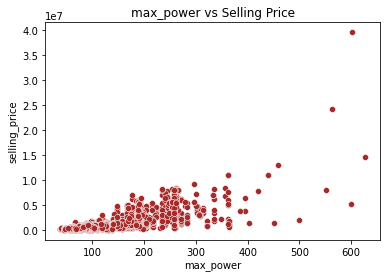

In [38]:
sns.scatterplot(data= data , x = "max_power", y = "selling_price", color = "brown")
plt.title('max_power vs Selling Price')

In [41]:
data[data["max_power"]<=550]

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [42]:
data[data["max_power"]>=100]

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
8,8,Hyundai Venue,Hyundai,Venue,2,20000,Individual,Petrol,Automatic,18.15,998,118.35,5,1050000
10,14,Hyundai Verna,Hyundai,Verna,8,65278,Dealer,Diesel,Manual,22.32,1582,126.32,5,425000
11,15,Renault Duster,Renault,Duster,5,50000,Individual,Diesel,Manual,19.64,1461,108.45,5,750000
12,16,Mini Cooper,Mini,Cooper,4,6000,Dealer,Petrol,Automatic,14.41,1998,189.08,5,3250000
15,19,Mercedes-Benz C-Class,Mercedes-Benz,C-Class,7,65000,Dealer,Diesel,Automatic,19.27,2143,170.00,5,1425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15394,19523,Volkswagen Vento,Volkswagen,Vento,7,95000,Dealer,Petrol,Automatic,16.93,1197,103.60,5,625000
15397,19527,Toyota Innova,Toyota,Innova,3,21265,Individual,Diesel,Automatic,11.36,2755,171.50,7,2350000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


## 3) Multivariate Analysis

**It refers to a set of statistical techniques used to examine and understand the relationships between multiple variables within a dataset simultaneously**

<AxesSubplot:>

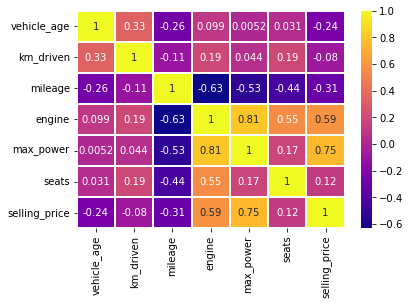

In [44]:
numerical_variables = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
sns.heatmap(data= data[numerical_variables].corr(), annot = True , cmap = "plasma", linewidth= 2)


 ### Summary of Correlation Insights:
1. **Vehicle Age vs. Selling Price**:  
   - **Negative correlation (-0.24)**: Older cars usually have lower prices.

2. **Kilometers Driven vs. Selling Price**:  
   - **Weak negative correlation (-0.08)**: Minor effect on selling price.

3. **Mileage vs. Selling Price**:  
   - **Moderate negative correlation (-0.31)**: Low-mileage cars tend to have higher prices.

4. **Engine Capacity vs. Selling Price**:  
   - **Moderate positive correlation (0.59)**: Larger engines often lead to higher prices.

5. **Max Power vs. Selling Price**:  
   - **Strong positive correlation (0.75)**: Higher max power correlates with higher prices.

6. **Seats vs. Selling Price**:  
   - **Weak positive correlation (0.12)**: Minor effect on price.


## Feature Engineering 

In [46]:
model_data = data.copy()
model_data.drop(labels = ["car_name","brand","model","seller_type"],axis = 1 , inplace =True)

model_data.head()

,Unnamed: 0,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,9,120000,Petrol,Manual,19.70,796,46.30,5,120000
1,1,5,20000,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,11,60000,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,9,37000,Petrol,Manual,20.92,998,67.10,5,226000
4,4,6,30000,Diesel,Manual,22.77,1498,98.59,5,570000


In [47]:
model_data = pd.get_dummies(model_data,dtype = float)
model_data

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,0,9,120000,19.70,796,46.30,5,120000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,5,20000,18.90,1197,82.00,5,550000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,11,60000,17.00,1197,80.00,5,215000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3,9,37000,20.92,998,67.10,5,226000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4,6,30000,22.77,1498,98.59,5,570000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,9,10723,19.81,1086,68.05,5,250000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,19540,2,18000,17.50,1373,91.10,7,925000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,19541,6,67000,21.14,1498,103.52,5,425000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,19542,5,3800000,16.00,2179,140.00,7,1225000,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [48]:
# Define features (X) and target (Y)
X = model_data.drop('selling_price', axis=1)  # Independent variables
Y = model_data['selling_price']  # Target variable

In [49]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")
X = model_data.drop('selling_price', axis = 1)

Training set size: (12328, 14), Testing set size: (3083, 14)


In [52]:
print(X_train)
print(X_test)

       Unnamed: 0  vehicle_age  km_driven  mileage  engine  max_power  seats  \
4287         5445            3      26000    18.60    1197      81.86      5   
7601         9724            5      50000    20.85    1197      83.14      5   
6444         8245            3      28500    28.09    1248      88.50      5   
12805       16233            2       6932    20.30    1086      68.07      5   
6919         8833            3      15799    17.50    1199      88.70      5   
...           ...          ...        ...      ...     ...        ...    ...   
10393       13255            7      55000    28.40    1248      74.00      5   
5745         7322            6      29678    22.74     796      47.30      5   
10956       13929           11     120000    14.00    2523      75.00      7   
6686         8535            5      50000    18.90    1197      82.00      5   
2868         3645            5      50000    22.15    1498     108.60      5   

       fuel_type_CNG  fuel_type_Diesel 

In [53]:
print(Y_train)
print(Y_test)

4287     675000
7601     460000
6444     925000
12805    650000
6919     749000
          ...  
10393    360000
5745     299000
10956    200000
6686     400000
2868     725000
Name: selling_price, Length: 12328, dtype: int64
11502    240000
11405    530000
14316     65000
14165    545000
3702     380000
          ...  
6430     795000
4830     590000
14128    375000
5977     425000
12679    475000
Name: selling_price, Length: 3083, dtype: int64


In [50]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(X_train,Y_train)
predictions = regressor.predict(X_test) 
predictions

array([ 192855.16552982,  519371.21107339, -721498.65224088, ...,
         64738.8222535 ,  560299.21889782,  322993.43940436])

In [54]:
X_test['predicted_sales_price'] = predictions

X_test['Actual_price'] = Y_train

X_test['difference'] = X_test['predicted_sales_price'] - X_test['Actual_price']

In [55]:
X_test

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual,predicted_sales_price,Actual_price,difference
11502,14598,9,72000,20.36,1197,78.90,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,192855.165530,NaN,NaN
11405,14473,5,44000,21.01,1197,81.80,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,519371.211073,NaN,NaN
14316,18153,15,100785,19.70,796,46.30,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-721498.652241,NaN,NaN
14165,17962,3,35505,23.84,1199,84.00,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,715598.258236,NaN,NaN
3702,4727,8,49000,22.07,1199,73.90,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,250286.000238,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,8228,3,21000,18.60,1197,81.86,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,641339.580737,NaN,NaN
4830,6127,2,5000,24.00,1186,73.97,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,687244.021099,NaN,NaN
14128,17914,11,64000,18.50,1197,80.00,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,64738.822253,NaN,NaN
5977,7639,4,50000,18.90,1197,81.86,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,560299.218898,NaN,NaN


### Evaluate model performance

In [57]:
# Evaluate model performance
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

# Display actual vs predicted values
comparison_df = pd.DataFrame({"Actual": Y_test.values, "Predicted": predictions})
print(comparison_df.head())

MAE: 272248.06479931035
MSE: 332858118431.06964
RMSE: 576938.5742269879
R² Score: 0.6430231618209199
   Actual      Predicted
0  240000  192855.165530
1  530000  519371.211073
2   65000 -721498.652241
3  545000  715598.258236
4  380000  250286.000238


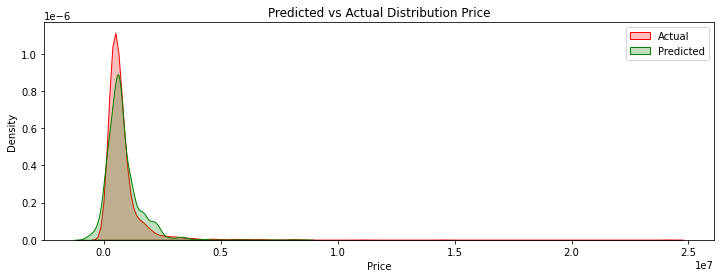

In [67]:
# Plotting Actual vs Predicted Distribution Price
plt.figure(figsize=(12,4))
sns.kdeplot(Y_test, color='red', label='Actual', fill=True)
sns.kdeplot(predictions, color='green', label='Predicted', fill=True)
plt.title('Predicted vs Actual Distribution Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()